<a href="https://colab.research.google.com/github/JaledMC/ESP12-PCB-example/blob/master/Import_image_and_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import_image_and_video.ipynb

This notebook explains how to import and save images and videos, from local folders or usb cameras, with OpenCV. If you don't have the needed libraries, run the next block.

In [0]:
!apt-get -qq install -y libsm6 libxext6 && pip3 install -q -U opencv-python
!pip3 install -q matplotlib
!pip3 install -q numpy
!pip3 install -q requests

Import the libraries

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Download images

To use the github images, first download the image to local folder.

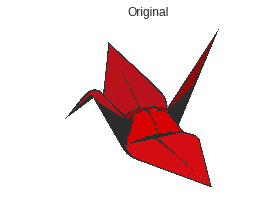

In [0]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://raw.githubusercontent.com/JaledMC/Learning-Artificial-Vision/master/images/origami.png')
img = Image.open(BytesIO(response.content))
img.save("origami.png")
# Represent the image
fig, axes = plt.subplots(1, 1, figsize=(4, 4))
axes.imshow(img)
axes.set_title('Original')
plt.axis("off");

## Import a local image

Now OpenCV part beginnings. We can import the image in black and white, or convert it later.  It's better to use an absolute path. 

In [0]:
image_gray = cv2.imread('/images/origami.png', cv2.IMREAD_GRAYSCALE)
image_color = cv2.imread('/images/origami.png')

In [0]:
image_gray = cv2.imread('origami.png', cv2.IMREAD_GRAYSCALE)
image_color = cv2.imread('origami.png')

image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

Color image:  (1439, 1920, 3) (1439, 1920, 3) uint8
Gray image:  (1439, 1920) (1439, 1920) uint8


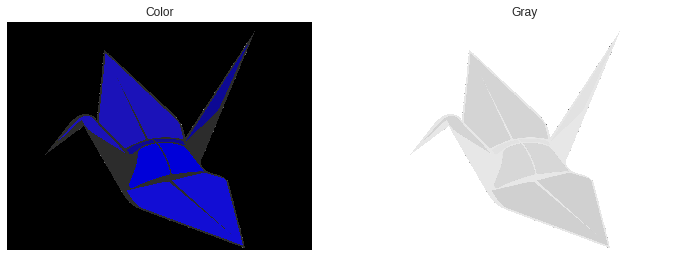

In [0]:
# Represent with matplotlib the image. We can obtain his pixel values and coordinates.
fig, axes = plt.subplots(1, 2, figsize=(12, 12))
axes[0].imshow(image_color)
axes[0].set_title('Color')
axes[1].imshow(image_gray)
axes[1].set_title('Gray')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

# image information
print("Color image: ", image_color.shape, image_color.shape, image_color.dtype)
print("Gray image: ", image_gray.shape, image_gray.shape, image_gray.dtype)

We can see how gray image is only a two dimensional matrix, which refers to intensity valued, while color image is a stack of 3 matrix with the blue, green and red valued. But, what happens? The colors are not the same as original image. Well, while most programs use a red-green-blue (RGB) representation, OpenCV use blue-green-red (BGR) form. Because of that, we have to change the image like with the gray transformation.



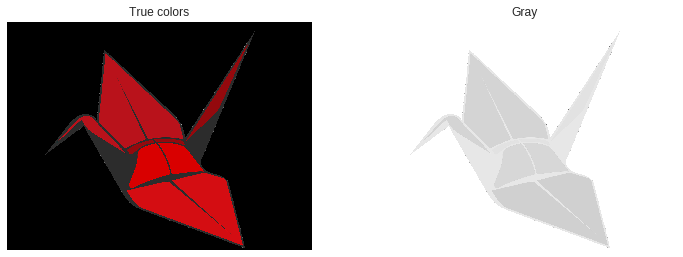

In [0]:
image_color = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)

# Represent with matplotlib the image. We can obtain his pixel values and coordinates.
fig, axes = plt.subplots(1, 2, figsize=(12, 12))
axes[0].imshow(image_color)
axes[0].set_title('True colors')
axes[1].imshow(image_gray)
axes[1].set_title('Gray')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

That seems better. To save the image:

In [0]:
cv2.imwrite('saved_image.png', image_color)

True

## Import a local video

As the same example, download the video to local folder.

In [0]:
"""response = requests.get('https://raw.githubusercontent.com/JaledMC/Learning-Artificial-Vision/master/images/dog_video.mp4')
with open('dog.mp4', 'wb') as f:
    f.write(response.content)  """

Now import the video with VideoCapture, and show frame by frame with a loop. The waitKey command is needed after the imshow, and it can adjusts the play speed. We can exit the video typing 'q' key. In that case, release video object and close all windows. **Video code doesn't work on Google Colab, because program runs in a VM. Use a local Jupyter Notebook for this.** If you want more information about how to play videos on Colab, this [link](https://github.com/bikz05/ipython-notebooks/blob/master/computer-vision/displaying-video-in-ipython-notebook.ipynb) and this [link](https://medium.com/@neotheicebird/webcam-based-image-processing-in-ipython-notebooks-47c75a022514) can help you.

In [0]:
"""# Import the video
cap = cv2.VideoCapture('dog.mp4')
speed = 25
exit_key = 'q'
while(cap.isOpened()):
    ret, frame = cap.read()
    cv2.imshow('frame', frame)
    # Play speed of the video can be adjust with waitKey time. 25 is the standard. Exit with 'q' key
    if cv2.waitKey(speed) & 0xFF == ord(exit_key):
        break
cap.release()
cv2.destroyAllWindows()"""

# USB camera

Access the video camera content is like play any local video, but we use the number channel ot the camera.

In [0]:
"""cap = cv2.VideoCapture(1)
while(True):
    _, frame = cap.read()
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()"""

error: ignored

## Capture an image with webcam
Use the key codes to execute different commands, in this case, take a shoot and save it. The only problem is know the number code of each key.

In [0]:
"""cap = cv2.VideoCapture(1)

while True:
    ret, video = cap.read()
    gray = cv2.cvtColor(video, cv2.COLOR_BGR2GRAY)
    cv2.imshow('Video', gray)
    
    k = cv2.waitKey(30) & 0xff
    if k == 113: # q
        frame = gray.copy()
        cv2.imshow('Frame', frame)
    if k == 27: # Esc
        break
        
cv2.imwrite('saved_image.png', frame)
cap.release()
cv2.destroyAllWindows()"""

To save a webcam video, create a video object with proper codecs (dependant of the OS) and size. When loop finish the video is saved.

In [0]:
"""# Save a video. Codec is dependant of the OS
cap = cv2.VideoCapture(1)
# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))  # name, codec, fps, frame size

while(True):
    _, frame = cap.read()
    out.write(frame);
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()"""